For the my midterm project, I began by investigating the changes in acidity over the years in our bay area. 
To give some context:
Water acidity can reflects the amount of carbon dioxide in the air. Bodies of water can "absorb" carbon dioxide molecules, as explained by the simple second law of thermodynamics. Naturally, over time, carbon dioxide molecules will flow from the place of higher concentration (the air) to the place of lower concentration (the body of water). Upon entering the body of water, carbon dioxide reacts with water in order to create carbonic acid, H2CO3, which is an acidic compound. Thus, the increase acidity in the bodies of water around the bay can provide us insight into the levels of pollution in recent years.
Additionally, as/(if) the amount of carbon dioxide increases in the atmosphere, which results in increased acidity of the water, can also be a concern if the ph of the water dips below a livable result.

In [7]:
import pandas as pd

import random
from scipy.stats.stats import pearsonr  

from collections import OrderedDict
from datetime import date

import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline 

# We're now going to import some important libraries
import statistics
import numpy.random # for generating a noisy data set
from sklearn import linear_model # for training a linear model

import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

from scipy.stats.stats import pearsonr 

import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting
#baydatafish = pd.read_csv('/Users/conhong/Desktop/Programming and Data Analytics/cd3_toxsediment_download.csv')
abymercury = pd.read_csv('/Users/conhong/Desktop/Programming and Data Analytics/Midterm-Bay/mercury.csv', encoding='iso-8859-1')
baydatafish = pd.read_csv('/Users/conhong/Desktop/Programming and Data Analytics/Midterm-Bay/cd3_toxsediment_download.csv')
fishtissue = pd.read_csv('/Users/conhong/Desktop/Programming and Data Analytics/Midterm-Bay/fish.csv', encoding='iso-8859-1')
metalsall = pd.read_csv('/Users/conhong/Desktop/Programming and Data Analytics/Midterm-Bay/metals.csv', encoding='iso-8859-1')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (22,50,104) have mixed types. Specify dtype option on import or set low_memory=False.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (1,26,104) have mixed types. Specify dtype option on import or set low_memory=False.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (22,26,32,50,86,87,88,89,91,92,97,98,104,112) have mixed types. Specify dtype option on import or set low_memory=False.



In [8]:
longitudevalues = list(abymercury['longitude'])
latitudevalues = list(abymercury['latitude'])
years = list(abymercury['sampleyear'])
results = list(abymercury['result'] )   
#print(list(fishtissue['result']))

In [9]:
latlongdict = []
for i in range(0, len(longitudevalues)):
    latlongdict.append(longitudevalues[i])
    
#print(latlongdict)

Acidity Changes over Time Graph

['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
260
The net change in pH is 0.0072294871794871636.


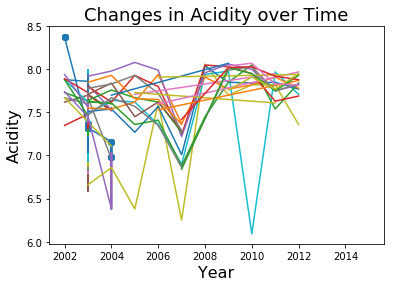

In [10]:
baydatapoints = abymercury[(abymercury['waterbodytype'] == "Bays and Harbors") & (abymercury['collectionmethod'] == 'Water_Grab') & (abymercury['unitname'] != 'mg/kg dw')]
datefish = baydatafish['sampledate']
dates2 = []
for i in datefish:
    fillip = str(i)
    dates2.append(fillip[0:4])

allyearss = []
for i in dates2:
    if i not in allyearss:
        allyearss.append(i)
print(allyearss)
ones = []
namesofplaces = baydatafish['stationname']
allplaces = []
for i in namesofplaces:
    if i not in allplaces:
        allplaces.append(i)
print(len(allplaces))
allthings = {}
for i in allplaces:
    clar = list(baydatafish[(baydatafish['stationname'] == i) ]['sampledate'])
    massar = list(baydatafish[(baydatafish['stationname'] == i)]['result'])
    zama = {}
    for z in allyearss:
        year = []
        for x in clar:
            if x[:4] == z:
                year.append(float(massar[clar.index(x)]))
        if len(year) !=0:
            zama.update({float(z):year})
    allthings.update({i:zama})
almeanz = {}
for i in allthings:
    x = allthings[i]
    means = []
    for z in x:
        sumy = 0
        w = x[z]
        #print(w)
        for e in w:
            #print(e)
            sumy += e
        means.append(sumy/len(w))
    almeanz.update({i:means})
#print(almeanz)
allchangez = []
for i in almeanz:
    s = almeanz[i]
    allchangez.append(s[0] - s[-1])
#print(allchangez)
sume = 0
for i in allchangez:
    sume += i
print("The net change in pH is " + str(sume/len(allchangez)) +".")
keel = allthings['Lake Lagunitas-01']
#print(keel)
xs = []
ys = []
for i in keel:
    for z in keel[i]:
        xs.append(i)
        ys.append(z)
        
plt.scatter(x=xs, y=ys)
plt.title("Changes in Acidity over Time - Lake Lagunitas-01", fontsize = 18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Acidity', fontsize=16)
xsss = []
ysss = []
for i in allthings:
    keel = allthings[i]
#print(keel)
    xss = []
    yss = []
    for i in keel:
        for z in keel[i]:
            xss.append(i)
            yss.append(z)
            xsss.append((i))
            ysss.append((z))
    plt.plot(xss, yss)
    plt.title("Changes in Acidity over Time", fontsize = 18)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Acidity', fontsize=16)
#for i in ysss:
 #   print(type({i}))

LinregressResult(slope=0.02418552434414239, intercept=-40.83702337729085, rvalue=0.25950609056049845, pvalue=1.6046591857007243e-32, stderr=0.00200110967745304)

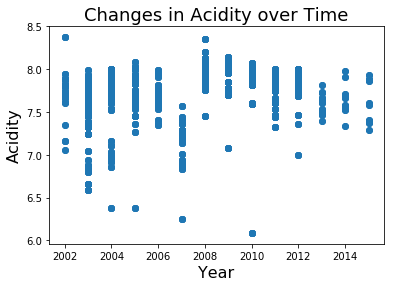

In [58]:
lime = plt.scatter(x=xsss, y = ysss)
plt.title("Changes in Acidity over Time", fontsize = 18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Acidity', fontsize=16)
from scipy.stats import linregress
linregress(xsss, ysss)


In [13]:
sanpablobaydatapoints = []
sanpablobaylatrange = [37.97, 38.15]
sanpablobaylongrange = [-122.507, -122.21]
for i in range(0, len(longitudevalues)):
    if sanpablobaylatrange[0] < i < sanpablobaylatrange[1]:
        if sanpablobaylongrange[0] < longitudevalues[latitudevalues.index(i)] < sanpablobaylongrange[1]:
            sanpablobaydatapoints.append(results[latitudevalues.index(i)])
            
print(sanpablobaydatapoints)


[0.027845067]


In [14]:
averages = {}
for i in allyearss:
    total = []
    for z in xsss:
        if i == z:
            total.append(ysss[xsss.index(z)])
    sumz = 0
    for y in total:
        sumz +=y
    if len(total) != 0:
        averages.update({i:sumz/len(total)})
yc = {}
for i in allyearss:
    yz = []
    for s in xsss:
        if s == i:
             yz.append(float(ysss[xsss.index(s)]))
    yc.update({i:yz})
meany = []
for key in yc:
    meany.append(sum(yc[key])/len(yc[key]))
plt.plot(allyearss, meany)
plt.title("Change in Average Acidity throughout the Years")
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average (ph)', fontsize=16)        
print(averages[min(averages, key=averages.get)])
#print(averages)
years = [averages['2013'], averages['2014'], averages['2015']]
if averages['2015'] - averages['2013'] > 0:
    print("The average acidity of the Bays and Harbors in the Bay Area have increased, on average, about " + str(averages['2015'] - averages['2013']) + " on the pH scale.")
if averages['2015'] - averages['2014'] > 0:
    print("Additionally, the acidity has still increased from the year before 2015 by " + str(averages['2015'] - averages['2014']) +" on the pH scale.")
if list(averages.values())[0] -  list(averages.values())[-1] < 0:
    print('yay?')
else:
    print("However, the overall acidity of the Bays and Harbors have, on average, increased from " + str(min(list(averages.keys())[0])) + ".")

baydatawateraciddeath = baydatafish[(baydatafish['result'] < 6.5) ]
baydatawateracideh = baydatafish[(baydatafish['result'] < 7.4) ]
warningplaces = []
for index,row in baydatawateraciddeath.iterrows():
    if row['waterbodytype'] == 'Bays and Harbors':
        if row['stationname'] not in warningplaces:
            warningplaces.append(row['stationname'])
print(warningplaces, "are all places of warning for their acidity.")
warninplaces = []
for index,row in baydatawateracideh.iterrows():
    if row['waterbodytype'] == 'Bays and Harbors':
        if row['stationname'] not in warningplaces:
            warninplaces.append(row['stationname'])
#print(warninplaces) 
sanjoaquinriver = baydatafish[(baydatafish['stationname'] == 'San Joaquin River (BG30)')]
xz = []
yz = []
keel = allthings['San Joaquin River (BG30)']
#print(keel)

#for i in keel:
    #for z in keel[i]:
       # xz.append(i)
        #yz.append(z)
#plt.scatter(x = xz, y = yz)
#print(yc['2003'])

ZeroDivisionError: division by zero

As one may also be able to interpret from the graphs above, the change in acidity over the years has no definite pattern. Additionally, the acidity of the waters in the Bay Area also hasn't significantly increased in the past. In the most recent data points, all of the bodies of water had a pH level greater than or equal to the ideal pH level in Bays and Harbors(a little greater than 7). 

In [15]:
def createreandomhistacid(xsss, ysss, num):
    yfinalo = []
    xfinalo = []
    for y in range(0, num):
        yfinalo.append(random.choice(ysss))
    plt.hist(yfinalo, bins = 50)

The average acidity overall is 7.706345679012373, which is a reasonable level of acidity. There are, as one can see in the graph, a few outliers below 7.0.
The last time an acidity level below seven was detected in 2012, which is far from where we are now in 2018.
Overall, the graph below demonstrates how the spread of the acidity levels is close to that of a normal distribution, and how the center of this spread mainly lies around 7.7, which is a good value for the acidity of the bodies of water.


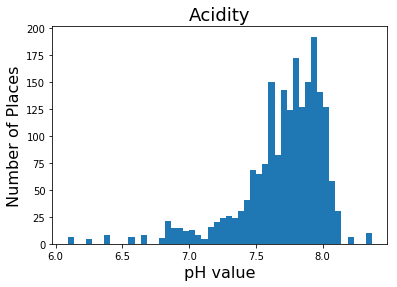

In [16]:
plt.hist(ysss, bins = 50)
plt.title("Acidity", fontsize = 18)
plt.xlabel('pH value', fontsize=16)
plt.ylabel('Number of Places', fontsize=16)
print("The average acidity overall is " + str(sum(ysss)/len(ysss)) +", which is a reasonable level of acidity. There are, as one can see in the graph, a few outliers below 7.0.")
belowseven = 0
yearsofbelowseven = []
for index, row in baydatafish.iterrows():
    if row['result'] < 7:
        #print(row['stationname'], row['sampledate'])
        if row['sampledate'][:4] not in yearsofbelowseven:
            yearsofbelowseven.append(row['sampledate'][:4])
print("The last time an acidity level below seven was detected in " + str(max(yearsofbelowseven)) +", which is far from where we are now in 2018.")

print('Overall, the graph below demonstrates how the spread of the acidity levels is close to that of a normal distribution, and how the center of this spread mainly lies around 7.7, which is a good value for the acidity of the bodies of water.')

In [59]:
for key in yc:
    if key == '2003':
        plt.hist(yc[key], bins = 50)
        plt.title("Number of Places vs Acidity")
        plt.xlabel("Acidity(pH)", fontsize = 16)
        plt.ylabel("Number of Places", fontsize = 16)
    if key == '2015':
        plt.hist(yc[key], bins = 50)
        plt.title("Number of Places vs Acidity")
        plt.xlabel("Acidity(pH)", fontsize = 16)
        plt.ylabel("Number of Places", fontsize = 16)
    #plt.show()

As you can see, the changes between the pH values measured in 2015 (orange) have increased since most earliest measured in 2003 (blue). Overall, acidity in the Bay Area remains safe since it was last measured in 2015, despite the acidity increasing in the years immediatly after 2003. Thus, the increasing acidity of the Bay Area shouldn't be an immediate concern, however with the recent wildfires and the increased emission of carbon monoxide, it is possible that acidity throughout the Bay Area has increased quite recently.

Mercury Analysis

In [18]:
longitudevalues = list(abymercury['longitude'])
latitudevalues = list(abymercury['latitude'])
years = list(abymercury['sampleyear'])
results = list(abymercury['result'] )    

latlongdict = []
for i in range(0, len(longitudevalues)):
    latlongdict.append(longitudevalues[i])
    
sanpablobaydatapoints = []
sanpablobaylatrange = [37.97, 38.15]
sanpablobaylongrange = [-122.507, -122.21]
for i in range(0, len(longitudevalues)):
    if sanpablobaylatrange[0] < i < sanpablobaylatrange[1]:
        if sanpablobaylongrange[0] < longitudevalues[latitudevalues.index(i)] < sanpablobaylongrange[1]:
            sanpablobaydatapoints.append(results[latitudevalues.index(i)])            
#print(sanpablobaydatapoints)

Ocean Mercury Levels:

Text(0,0.5,'Mercury Levels (ug/l)')

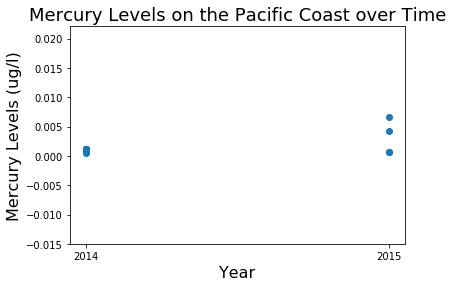

In [19]:
oceandatapoints = abymercury[(abymercury['waterbodytype'] == 'Ocean') & (abymercury['collectionmethod'] == 'Water_Grab')]

allrepeatyears = []
for index, row in oceandatapoints.iterrows():
       allrepeatyears.append(row['sampledate'][:4])
allyears = []
for i in allrepeatyears:
    if i not in allyears:
        allyears.append(i)
        
#print(len(allyears))
unitsperl = []
for index, row in oceandatapoints.iterrows():
    if '/l' in row['unitname']:
        if row['unitname'] not in unitsperl:
            unitsperl.append(row['unitname'])
        
#print(unitsperl)
yearrdict = {}
for x in allyears:
    listx = []
    for index, row in oceandatapoints.iterrows():
        if row['sampledate'][:4] == x:
            listx.append(row['result'])
    yearrdict.update({x:listx})

xpoints = []
ypoints = []
for i in yearrdict:
    yes = yearrdict[i]
    for z in yes:
        #print(i, z)
        xpoints.append(i)
        ypoints.append(z)

plt.scatter(x= xpoints, y = ypoints)#s, bins = 100)
plt.title("Mercury Levels on the Pacific Coast over Time", fontsize = 18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mercury Levels (ug/l)', fontsize=16)

Mercury Levels in the Bays and Harbors

0.6015555944445519


Text(0,0.5,'Mercury Densities (ug/l)')

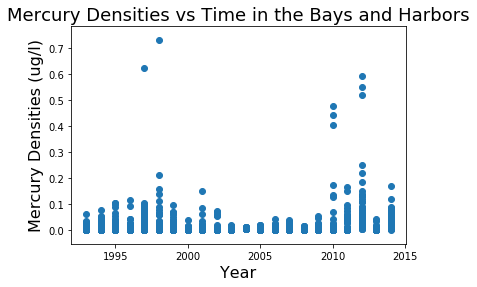

In [20]:
baydatapoints = abymercury[(abymercury['waterbodytype'] == "Bays and Harbors") & (abymercury['collectionmethod'] == 'Water_Grab') & (abymercury['unitname'] != 'mg/kg dw')]
print(oceandatapoints.corr()['sampleyear']['result'])
units = []
for index, row in baydatapoints.iterrows():
    if row['unitname'] not in units:
        units.append(row['unitname'])
        
#print(units)
bayyears = []
for index, row in baydatapoints.iterrows():
        bayyears.append(row['sampleyear'])
        
allyearz = []
for i in bayyears:
    if i not in allyearz:
        allyearz.append(int(i))

allthingz = {}
for i in allyearz:
    listty = []
    for index, row in baydatapoints.iterrows():
        if row['sampleyear'] == i:
            if row['sampletype'] == "Grab":
                if row['unitname'] == 'ng/l':
                    listty.append(row['result'] * 10 ** -3)
                if row['unitname'] == 'ug/l':
                    listty.append(row['result'])
    allthingz.update({i:listty})

xpointz = []
ypointz = []
for i in allthingz:
    zes = allthingz[i]
    for z in zes:
        xpointz.append(i)
        ypointz.append(z)

plt.scatter(x = xpointz, y = ypointz)
plt.title("Mercury Densities vs Time in the Bays and Harbors", fontsize = 18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mercury Densities (ug/l)', fontsize=16)

[2003, 2002, 2004, 2005, 2006, 2009, 2010, 2011, 2012, 2014, 2013, 2000, 2001, 2007, 2008, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
The correlation between the average mercury levels is (0.24177952162779145, 0.2783494430531017), which shows that these there hasn't been a predictable change in the mercury levels over the years.


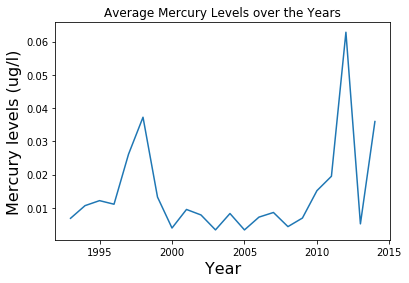

In [21]:
ayer = []
for i in xpointz:
    if i not in ayer:
        ayer.append(int(i))
print(ayer)
ayeaer = sorted(ayer, key=int) 
thingswithyar = {}
for e in ayeaer:
    year = []
    for i in ypointz:
        if xpointz[ypointz.index(i)] == e:
            year.append(i)
    thingswithyar.update({e:year})
thinmene = []
for i in thingswithyar:
    ey = thingswithyar[i]
    thinmene.append(sum(ey)/len(ey))
#print(thinmene)
plt.plot(ayeaer, thinmene)
plt.title("Average Mercury Levels over the Years")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Mercury levels (ug/l)", fontsize = 16)
print("The correlation between the average mercury levels is " + str(pearsonr(ayeaer, thinmene)) + ", which shows that these there hasn't been a predictable change in the mercury levels over the years.")

0.01280062731381162


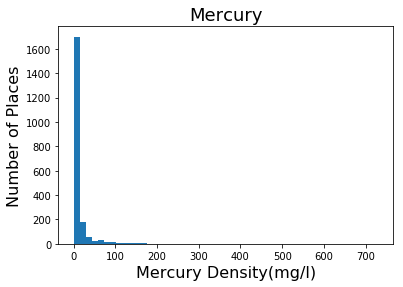

In [22]:
ytwforhist = []
for i in ypointz:
    ytwforhist.append(i * 1000)
plt.hist(ytwforhist, bins = 50)
plt.title("Mercury", fontsize = 18)
plt.xlabel('Mercury Density(mg/l)', fontsize=16)
plt.ylabel('Number of Places', fontsize=16)
print(sum(ytwforhist)/len(ytwforhist) * 10 ** -3)

In [24]:
warningplaces = []
for index,row in baydatawateraciddeath.iterrows():
    if row['waterbodytype'] == 'Bays and Harbors':
        if row['stationname'] not in warningplaces:
            warningplaces.append(row['stationname'])
print(warningplaces)

NameError: name 'baydatawateraciddeath' is not defined

In [25]:
#print(allthings['Bontempe Reservoir - Lake Bontempe-01'])
sumc = 0
for v in ypointz:
    sumc += v
ave = sumc/len(ypointz)
print(float(ave * 10 ** -3))
print(ave)
#ug/l to mg/l is * 10 * -3
#The MCLG for mercury is 0.002 mg/L or 2 ppb. 

1.2800627313811644e-05
0.012800627313811644


In [26]:
acidwrong = []
for index, row in baydatapoints.iterrows():
    for i in warningplaces:
        if row['stationname'] == i:
            if row['unitname'] == 'ug/l':
                if row['result'] > ave:
                    if row['stationname'] not in acidwrong:
                        acidwrong.append(row['stationname'])        
            else:
                if row['unitname'] == 'ng/l':
                    if row['result'] * 1000 > ave:
                        if row['stationname'] not in acidwrong:
                            acidwrong.append(row['stationname'])

In [27]:
print(len(acidwrong)/len(warningplaces))

ZeroDivisionError: division by zero

In [28]:
mercurywrongs = []
#mercury - xthingz year, ythinz result
for index, row in baydatapoints.iterrows():
    if row['unitname'] == 'ug/l':
        if row['result'] > ave:
            if row['stationname'] not in mercurywrongs:
                mercurywrongs.append(row['stationname'])
    else:
        if row['unitname'] == 'ng/l':
            if row['result'] * 1000 > ave:
                if row['stationname'] not in mercurywrongs:
                    mercurywrongs.append(row['stationname'])
                    
#print(mercurywrongs)
bas = []
for i in mercurywrongs:
    if "Bay" in i:
        bas.append(i)
#print(baes)
mores = []
for i in bas:
    if "San Pablo Bay" not in i and "Suisun Bay" not in i:
        mores.append(i)
print("Out of all the places with mercury levels above the average, stations in San Pablo Bay and Suisun Bay make up approximately " + str(len(mores)/len(mercurywrongs)) +" of this population.")

Out of all the places with mercury levels above the average, stations in San Pablo Bay and Suisun Bay make up approximately 0.3950617283950617 of this population.


In [29]:
for i in mercurywrongs:
    if i in acidwrong:
        print(i, "is the site with both mercury warning levels and acidity warning levels.")   

In [30]:
#for index, row in abymercury.iterrows():
    #if row['stationname'] == 'San Joaquin River (BG30)':
        #print(row["longitude"])
        #print(row['latitude'])

Acidic water is corrosive. Thus, the acidity of the body of water can expedite the process of harmful metals entering the water, such as mercury. I tested this hypothesis, that a decreased acidity would result in an increased amount of mercury.

LinregressResult(slope=-0.0696320251338814, intercept=0.768820361864062, rvalue=-0.13782472323525782, pvalue=0.08029188443388775, stderr=0.03956009914437323)


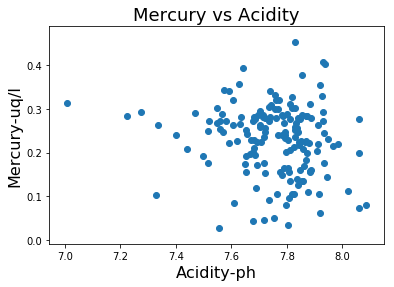

In [31]:
namesofplaes = abymercury[(abymercury['waterbodytype'] == "Bays and Harbors")]['stationname']
#(baydatafish['stationname'] == 'San Joaquin River (BG30)')]
#baydatafish[(baydatafish['stationname'] == i) ]['sampledate']
allplaes = []
for i in namesofplaes:
    if i not in allplaes:
        allplaes.append(i)
#print(allplaes)
bof = []
for i in allplaes:
    if i in allplaces:
        bof.append(i)
#print(bof)
xc = []
yc = []
for i in bof:
    stusmer = list(abymercury[(abymercury['stationname'] == i)]['result'])
    weeacid = list(baydatafish[(baydatafish['stationname'] == i)]['result'])
    xc.append(sum(stusmer)/len(stusmer))
    yc.append(sum(weeacid)/len(weeacid))

althines = {}
#print(allplaes)
for i in allplaes:
    fear = list(abymercury[(abymercury['stationname'] == i) ]['sampledate'])
    jassar = list(abymercury[(abymercury['stationname'] == i)]['result'])
    zama = {}
    for z in allyearz:
        year = []
        for x in fear:
            if x[:4] == z:
                print(z)
                year.append(jassar[fear.index(x)])
        if len(year) != 0:
            zama.update({z:year})
    althines.update({i:zama})
for i in yc:
    if i < 7:
        xc.remove(xc[yc.index(i)])
        yc.remove(i)
plt.scatter(yc, xc)
plt.title("Mercury vs Acidity", fontsize = 18)
plt.xlabel('Acidity-ph', fontsize=16)
plt.ylabel('Mercury-uq/l', fontsize=16)
print(linregress(yc, xc))

From the graphs, we see that there is a little correlation between the amount of mercury levels and the acidity of the water. 

In [32]:
from scipy.stats.stats import pearsonr   
  
print("Additionally, the correlation between the mercury levels and the pH of the water is "+ str(pearsonr(yc, xc)) +", values that show that these two units aren't very correlated (closer to 0 than 1 or -1).")


Additionally, the correlation between the mercury levels and the pH of the water is (-0.13782472323525777, 0.0802918844338873), values that show that these two units aren't very correlated (closer to 0 than 1 or -1).


Focus on Suisun Bay and Suisun Fleet:

Additionally, San Pablo Bay, Suisun Bay and station San Joaquin (BG30) are all near the cross section between the SF bay and the San Joaquin and Sacremento Rivers. Primarly in Suisun Bay, which is home to a fleet of naval vessels, how would the acidity of the water speed up the corrosion of the boats, and affect the amount of metal contaminants in the water?

Our alternative hypothesis in this situation would be that there is a correlation between the acidity of the water, and the amount of mercury pollutants. The null hypothesis would be that such correlation doesn't exist. 

In [33]:
merpablo = abymercury[(abymercury['stationname'].str.contains("San Pablo Bay")) & (abymercury['collectionmethod'] == "Water_Grab")]
mersuis = abymercury[(abymercury['stationname'].str.contains("Suisun Bay")) & (abymercury['collectionmethod'] == "Water_Grab")]
merjoaquin = abymercury[(abymercury['stationname'] == "San Joaquin (BG30)")  & (abymercury['collectionmethod'] == "Water_Grab")]


In [34]:
merpablostat = []
for index, row in merpablo.iterrows():
    if row['stationname'] not in merpablostat:
        merpablostat.append(row['stationname'])
#print(merpablostat)

In [35]:
merjoaquinstat = []
for index, row in merjoaquin.iterrows():
    if row['stationname'] not in merjoaquinstat:
        merjoaquinstat.append(row['stationname'])
#print(mersuisstat)

In [36]:
mersuisstat = []
for index, row in mersuis.iterrows():
    if row['stationname'] not in mersuisstat:
        mersuisstat.append(row['stationname'])
#print(mersuisstat)

In [37]:
suisacid = baydatafish[(baydatafish['stationname'].str.contains("Suisun Bay"))]
#suisacid

In [38]:
yearsmersuis = []
for index, row in mersuis.iterrows():
    if row['sampleyear'] not in yearsmersuis:
        yearsmersuis.append(row['sampleyear'])
print(yearsmersuis)

[2010, 2011, 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2008, 2013]


In [39]:
yearsfinalsuis = []
for n in yearsmersuis:
    for index, row in suisacid.iterrows():
        if int(row['sampledate'][:4]) == n:
            #print(int(row['sampledate'][:4]))
            if int(row['sampledate'][:4]) not in yearsfinalsuis:
                yearsfinalsuis.append(int(row['sampledate'][:4]))
print(yearsfinalsuis)

[2010, 2011, 2003, 2004, 2005, 2006, 2007, 2009, 2008]


In [40]:
finalresultsacid = {}
for u in yearsfinalsuis:
    yearval = []
    for index, row in suisacid.iterrows():
        if int(row['sampledate'][:4]) == u:
            yearval.append(float(row['result']))
    finalresultsacid.update({u:(sum(yearval)/len(yearval))})
print(finalresultsacid)

{2010: 8.059574468085106, 2011: 7.729583333333334, 2003: 7.113125000000001, 2004: 7.7015, 2005: 7.771875, 2006: 7.74, 2007: 7.522500000000001, 2009: 7.982127659574467, 2008: 7.841666666666665}


In [41]:
finalresultsmer = {}
for u in yearsfinalsuis:
    yearvaleus = []
    for index, row in mersuis.iterrows():
        if row['sampleyear'] == u:
            #print(row['unitname'])
            yearvaleus.append(row['result'])
    finalresultsmer.update({u:(sum(yearvaleus)/len(yearvaleus))})

In [42]:
finaldice = {}
for key, value in finalresultsacid.items():
    er = key
    for key, value in finalresultsmer.items():
        if er == key:
            finaldice.update({finalresultsacid[er]:finalresultsmer[key]})

In [43]:
print(finaldice)

{8.059574468085106: 0.00159875, 7.729583333333334: 0.002995, 7.113125000000001: 0.005311666666666666, 7.7015: 0.005768265538461539, 7.771875: 0.009263333333333333, 7.74: 0.0033352459999999996, 7.522500000000001: 0.008845, 7.982127659574467: 0.005180000000000001, 7.841666666666665: 0.0020833333333333333}


In [44]:
xvaluesph = []
yvaluesmer = []
for key, value in finaldice.items():
    xvaluesph.append(key)
    yvaluesmer.append(value)

LinregressResult(slope=-0.003703949362123437, intercept=0.03351823868298758, rvalue=-0.3717930978611266, pvalue=0.3245002362407982, stderr=0.0034955084485332015)


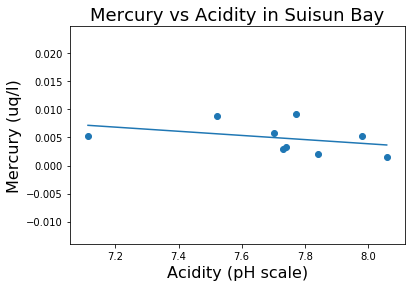

In [45]:
plt.scatter(xvaluesph, yvaluesmer)
plt.title("Mercury vs Acidity in Suisun Bay", fontsize = 18)
plt.xlabel('Acidity (pH scale)', fontsize=16)
plt.ylabel('Mercury (uq/l)', fontsize=16)
print(linregress(xvaluesph, yvaluesmer))
plt.plot(np.unique(xvaluesph), np.poly1d(np.polyfit(xvaluesph, yvaluesmer, 1))(np.unique(xvaluesph)))

In [46]:
ironstuff = metalsall[(metalsall['analyte'] == "Iron") &(metalsall['stationname'].str.contains("Suisun Bay"))]

In [47]:
yearsuisacid = []
for index, row in suisacid.iterrows():
    if int(row['sampledate'][:4]) not in yearsuisacid:
        yearsuisacid.append(int(row['sampledate'][:4]))
print(yearsuisacid)

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]


In [48]:
yearfinalacidiron = []
for index, row in ironstuff.iterrows():
    #print(row['stationname'])
    if int(row['sampleyear']) in yearsuisacid:
        if int(row['sampleyear']) not in yearfinalacidiron:
            yearfinalacidiron.append(row['sampleyear'])

In [49]:
lolirocid = {}
for e in yearfinalacidiron:
    iroyer = []
    for index, row in ironstuff.iterrows():
        if int(row['sampleyear']) == e:
            if row['unitname'] == 'ug/l':
                if row['sampletype'] == "Grab":
                    #if row['labagency'] == "PHYSIS":
                    iroyer.append(float(row['result']))
                    #print(row['unitname'])
            #print(row['unitname'])
    #print(iroyer)
    #print(e)
    if len(iroyer) != 0:
        lolirocid.update({e:iroyer})

In [54]:
print(xoxo)

[8.059574468085106, 7.729583333333334, 7.113125000000001, 7.7015, 7.771875, 7.74, 7.522500000000001, 7.841666666666665, 7.982127659574467]


In [51]:
xoxo = []
yoyo = []
for i in lolirocid:
    momo = lolirocid[i]
    yoyo.append(sum(momo)/len(momo))
    xoxo.append(finalresultsacid[i])

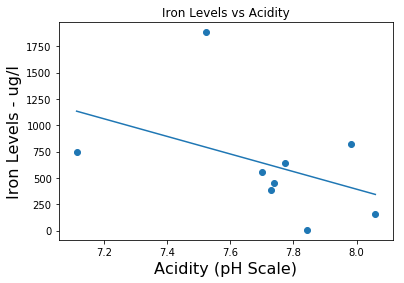

In [55]:
plt.scatter(xoxo, yoyo)
#finalresultsacid
plt.xlabel("Acidity (pH Scale)", fontsize = 16)
plt.ylabel("Iron Levels - ug/l", fontsize = 16)
plt.title("Iron Levels vs Acidity")
plt.plot(np.unique(xoxo), np.poly1d(np.polyfit(xoxo, yoyo, 1))(np.unique(xoxo)))
print(linregress(xoxo, yoyo))

In [56]:
coppers = metalsall[(metalsall['analyte'] == "Copper") &(metalsall['stationname'].str.contains("Suisun Bay"))]

In [289]:
yearfinalacidcop = []
for index, row in coppers.iterrows():
    #print(row['stationname'])
    if int(row['sampleyear']) in yearsuisacid:
        if int(row['sampleyear']) not in yearfinalacidcop:
            yearfinalacidcop.append(row['sampleyear'])

In [290]:
print(yearfinalacidcop)

[2010, 2011, 2012, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [291]:
copcid = {}
for e in yearfinalacidcop:
    iroyer = []
    for index, row in coppers.iterrows():
        if int(row['sampleyear']) == e:
            if row['unitname'] == 'ug/l':
                if row['sampletype'] == "Grab":
                    #if row['labagency'] == "PHYSIS":
                    iroyer.append(float(row['result']))
                    #print(row['unitname'])
            #print(row['unitname'])
    #print(iroyer)
    #print(e)
    if len(iroyer) != 0:
        copcid.update({e:iroyer})

In [292]:
print(copcid)

{2010: [2.5, 1.73, 2.34, 2.6, 2.72, 1.94, 2.67, 2.06, 2.36, 3.51], 2011: [2.08, 2.35, 3.56, 2.14, 3.27, 3.5], 2003: [1.636821111, 1.415148928, 1.78598516, 4.7008143460000005, 5.039404516, 1.503105269, 3.912092882], 2004: [1.43878, 2.58166, 4.627759999999999, 6.93692, 4.75586, 1.71092, 2.36483, 3.5496199999999996], 2005: [1.6762, 4.9488, 3.4225, 4.0659, 1.7690000000000001, 1.9241, 1.9934, 4.3894], 2006: [2.1823645480000002, 1.796216917, 3.752260923, 1.736495645, 2.908393953, 4.250189699, 1.9046119780000001, 3.290328817], 2007: [2.68, 6.26, 2.24, 2.32, 3.75, 4.58], 2008: [2.29, 2.99, 3.23, 2.33, 2.76, 2.13], 2009: [1.96, 3.61, 2.43, 3.24, 1.94, 2.0, 5.16, 2.73, 2.82]}


In [293]:
xa = []
ya = []
for i in copcid:
    momo = copcid[i]
    if finalresultsacid[i] < 7.4:
        print(i)
        print(finalresultsacid[i])
        print(sum(momo)/len(momo))
    if finalresultsacid[i] > 7.4:
        ya.append(sum(momo)/len(momo))
        xa.append(finalresultsacid[i])

2003
7.113125000000001
2.8561960302857146


LinregressResult(slope=-1.9315378484421966, intercept=18.00906459954842, rvalue=-0.7799767199665483, pvalue=0.02242765558235265, stderr=0.6326848503552862)
There was an outlier of (7.113, 2.856) in 2003, that didn't fit the trend of this data here.


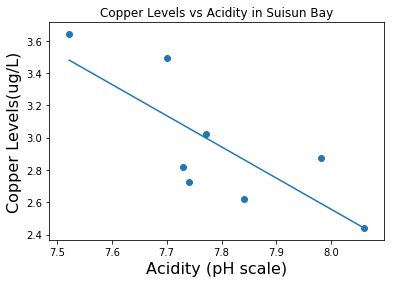

In [294]:
plt.scatter(xa, ya)
plt.title("Copper Levels vs Acidity in Suisun Bay")
plt.xlabel("Acidity (pH scale)", fontsize = 16)
plt.ylabel("Copper Levels(ug/L)", fontsize = 16)
print(linregress(xa, ya))
plt.plot(np.unique(xa), np.poly1d(np.polyfit(xa, ya, 1))(np.unique(xa)))
print("There was an outlier of (7.113, 2.856) in 2003, that didn't fit the trend of this data here.")

In [299]:
xas = []
yas = []
for i in xa:
    xas.append(i)
xas.append(7.113)
for y in ya:
    yas.append(y)
yas.append(2.856)

In [300]:
print(linregress(xas, yas))

LinregressResult(slope=-0.1942902876136849, intercept=4.406466308702787, rvalue=-0.19213743452343013, pvalue=0.5714039586362747, stderr=0.3307880057756007)
